In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sigma_1 = 2
sigma_2 = 1

in_dim = 3
out_dim = 4
hidden_dim = 5

In [44]:


def initialise_weights(in_dim, hidden_dim, out_dim):
    init_w2 = np.random.normal(loc=0.0, scale = sigma_2 / np.sqrt(out_dim), size=(out_dim, hidden_dim))
    init_w1 = np.random.normal(loc=0.0, scale = sigma_1 / np.sqrt(in_dim), size=(hidden_dim, in_dim))
    return init_w1, init_w2 

balanced_coeffs = []
diff_norms = []
lmda = sigma_2**2 - sigma_1**2
max_dim = 50
for in_dim in range(1, max_dim):
    init_w1, init_w2 = initialise_weights(in_dim, max_dim, in_dim)
    balanced = init_w2.T@init_w2 - init_w1@init_w1.T 
    diff_norms.append(np.linalg.norm(lmda * np.eye(max_dim) - balanced)**2)
    balanced_coeffs.append(balanced[0][0])



In [45]:
lmda

-3

In [46]:
balanced_coeffs

[-4.883428723513239,
 0.4921921562672511,
 -0.037377047512007266,
 0.5191770792389234,
 -0.38116850756254217,
 -1.8531041036171065,
 -2.3708158877225785,
 -2.5930329644015573,
 -3.119981526001532,
 -5.826997504901213,
 -7.62211181348036,
 -0.33468120782586874,
 -1.5341993715166093,
 -3.6782402572007684,
 -1.1720395974170796,
 -2.9655296589318434,
 -4.047711638651542,
 -2.205237550206142,
 0.09734580555291528,
 -3.0850135747050924,
 -4.013866949630825,
 -1.3519484274665623,
 -2.98097529687685,
 -2.983533642256158,
 -4.868806216805809,
 -1.5922982616127863,
 -4.323922126556404,
 -4.623494258851139,
 -3.440884318884706,
 -1.8714814259271582,
 -4.204831804016367,
 -5.630432984068374,
 -3.2067493844332002,
 -3.5939554681431476,
 -1.8188109842881954,
 -2.8771574169724343,
 -3.0115187263236436,
 -2.8990810511698273,
 -3.971933491202455,
 -4.190913497506941,
 -2.635889243645543,
 -4.092971759326385,
 -3.220982358234001,
 -3.012479692616042,
 -3.4958380379971197,
 -4.283907208143009,
 -3.065932

-2.926605128111575


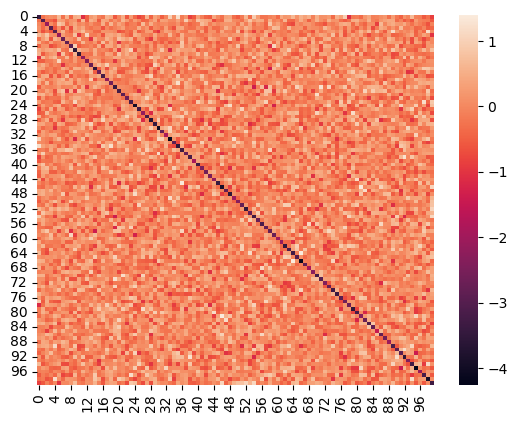

In [47]:
dim = 100
init_w1, init_w2 = initialise_weights(dim, dim, dim)
balanced = init_w2.T@init_w2 - init_w1@init_w1.T 
avg = np.sumx(np.diag(balanced))/len(balanced)
sns.heatmap(balanced)
print(avg)

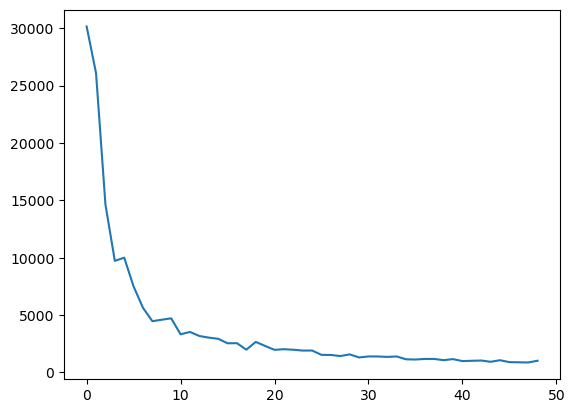

In [48]:
plt.plot(diff_norms)

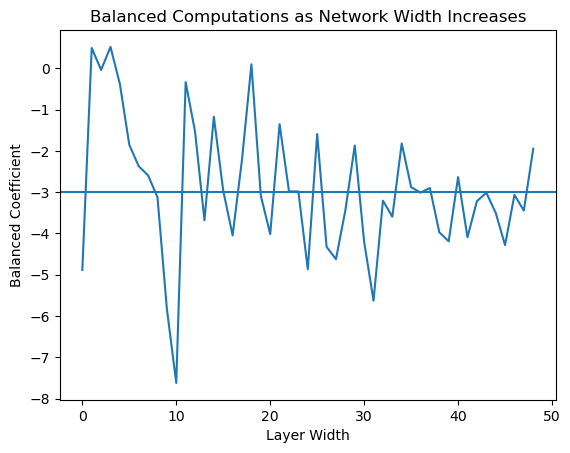

In [49]:
#Plot Theoretical expected value as well

plt.title('Balanced Computations as Network Width Increases')
plt.xlabel('Layer Width')
plt.ylabel('Balanced Coefficient')
plt.plot(balanced_coeffs)
plt.axhline(sigma_2**2-sigma_1**2)

In [91]:
def lecun_initialise(in_dim, hidden_dim, out_dim):
    sigma_one = np.sqrt(1/in_dim)
    sigma_two = np.sqrt(1/hidden_dim)


    init_w2 = np.random.normal(loc=0.0, scale = sigma_two, size=(out_dim, hidden_dim))
    init_w1 = np.random.normal(loc=0.0, scale = sigma_one, size=(hidden_dim, in_dim))

    return init_w1, init_w2


def he_initialise(in_dim, hidden_dim, out_dim):
    sigma_one = np.sqrt(2/in_dim)
    sigma_two = np.sqrt(2/hidden_dim)


    init_w2 = np.random.normal(loc=0.0, scale = sigma_two, size=(out_dim, hidden_dim))
    init_w1 = np.random.normal(loc=0.0, scale = sigma_one, size=(hidden_dim, in_dim))

    return init_w1, init_w2 


def scaled_initialise(in_dim, hidden_dim, out_dim, alpha_one, alpha_two):
    sigma_one = np.sqrt(1/in_dim) * alpha_one
    sigma_two = np.sqrt(1/hidden_dim) * alpha_two


    init_w2 = np.random.normal(loc=0.0, scale = sigma_two, size=(out_dim, hidden_dim))
    init_w1 = np.random.normal(loc=0.0, scale = sigma_one, size=(hidden_dim, in_dim))

    return init_w1, init_w2

def glorot_initialise(in_dim, hidden_dim, out_dim):
    sigma_one = np.sqrt(2/(in_dim + hidden_dim))
    sigma_two = np.sqrt(2/(hidden_dim + out_dim))


    init_w2 = np.random.normal(loc=0.0, scale = sigma_two, size=(out_dim, hidden_dim))
    init_w1 = np.random.normal(loc=0.0, scale = sigma_one, size=(hidden_dim, in_dim))

    return init_w1, init_w2


def get_balanced(w1, w2):
    return w2.T @ w2 - w1 @ w1.T

In [159]:
##Do an example with LeCun, He, Scaled and Glorot


## Do ratio 1 : 5 : 2

nodes = 40
ratio = (1, 3, 5)
alpha_one = 1
alpha_two = 2

weight_inits = dict()
weight_inits['LeCun'] = lecun_initialise(nodes, nodes*ratio[1], nodes*ratio[2])
weight_inits['He'] = he_initialise(nodes, nodes*ratio[1], nodes*ratio[2])
weight_inits['Scaled'] = scaled_initialise(nodes, nodes*ratio[1], nodes*ratio[2], alpha_one, alpha_two)
weight_inits['Glorot'] = glorot_initialise(nodes, nodes*ratio[1], nodes*ratio[2])


balancedness = dict()

for (key, (w1, w2)) in weight_inits.items():
    print(key)
    balancedness[key] = get_balanced(w1, w2)







LeCun
He
Scaled
Glorot


In [109]:
w1, w2 = lecun_initialise(nodes, nodes*ratio[1], nodes*ratio[2])

In [110]:
w1.shape

(200, 40)

In [111]:
(w2.T@w2).shape

(200, 200)

<Axes: >

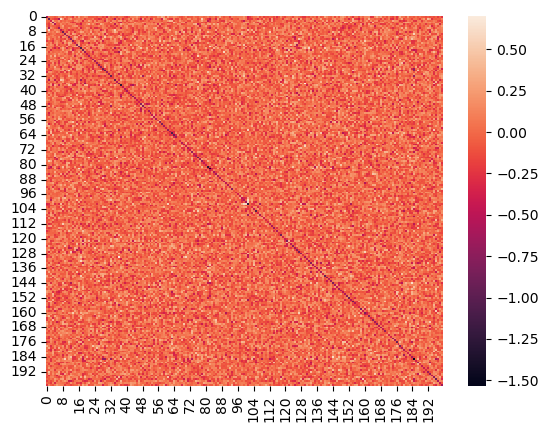

In [112]:
sns.heatmap(w2.T @ w2 - w1 @ w1.T)

In [151]:
nodes = 40
w1, w2 = glorot_initialise(nodes*5, nodes*10, nodes)

In [152]:
evals2, _ = np.linalg.eig(w2.T @ w2)
evals1, _ = np.linalg.eig(w1 @ w1.T)

/Users/nicolasanguita/miniforge3/envs/dgl-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/nicolasanguita/miniforge3/envs/dgl-env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


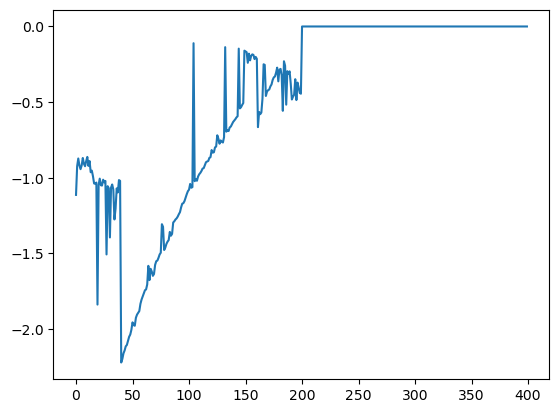

In [153]:
plt.plot(evals2 - evals1)

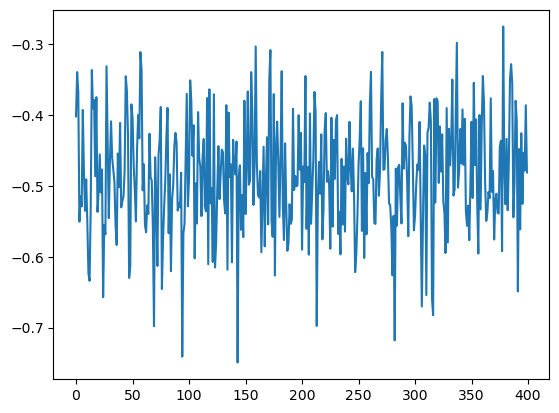

In [154]:
plt.plot(np.diag(w2.T @ w2 - w1 @ w1.T))

<Axes: >

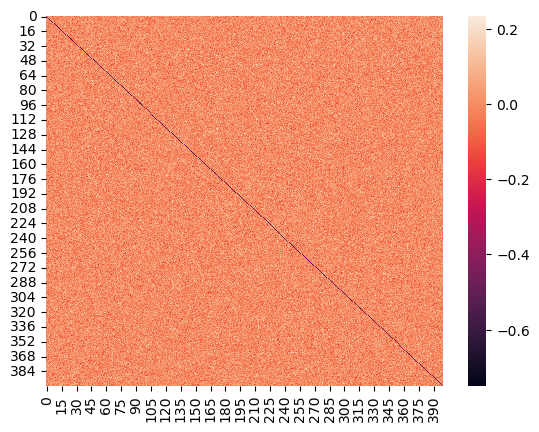

In [155]:
sns.heatmap(w2.T @ w2 - w1 @ w1.T)

In [107]:
(w1@w1.T).shape

(200, 200)

In [105]:
w2 @ w1 

array([[ 0.18697333, -0.07055315, -0.04557242, ...,  0.15367896,
         0.07020954, -0.13571789],
       [ 0.12428603,  0.10306673,  0.13057752, ..., -0.01239148,
         0.05211868, -0.22422991],
       [-0.11584774, -0.0069763 , -0.22684674, ..., -0.15987591,
        -0.05918511,  0.17724616],
       ...,
       [ 0.1234479 ,  0.04858725,  0.09974766, ...,  0.02303251,
         0.02409948, -0.01251055],
       [-0.01290857, -0.11966632, -0.01636294, ..., -0.14643366,
         0.04740106,  0.05129264],
       [-0.12434496, -0.09196005, -0.14665285, ...,  0.01873395,
         0.06506198,  0.08953717]])

In [101]:
w1, w2 = weight_inits['Glorot']

print(w1.shape)
print(w2.shape)

(200, 40)
(80, 200)


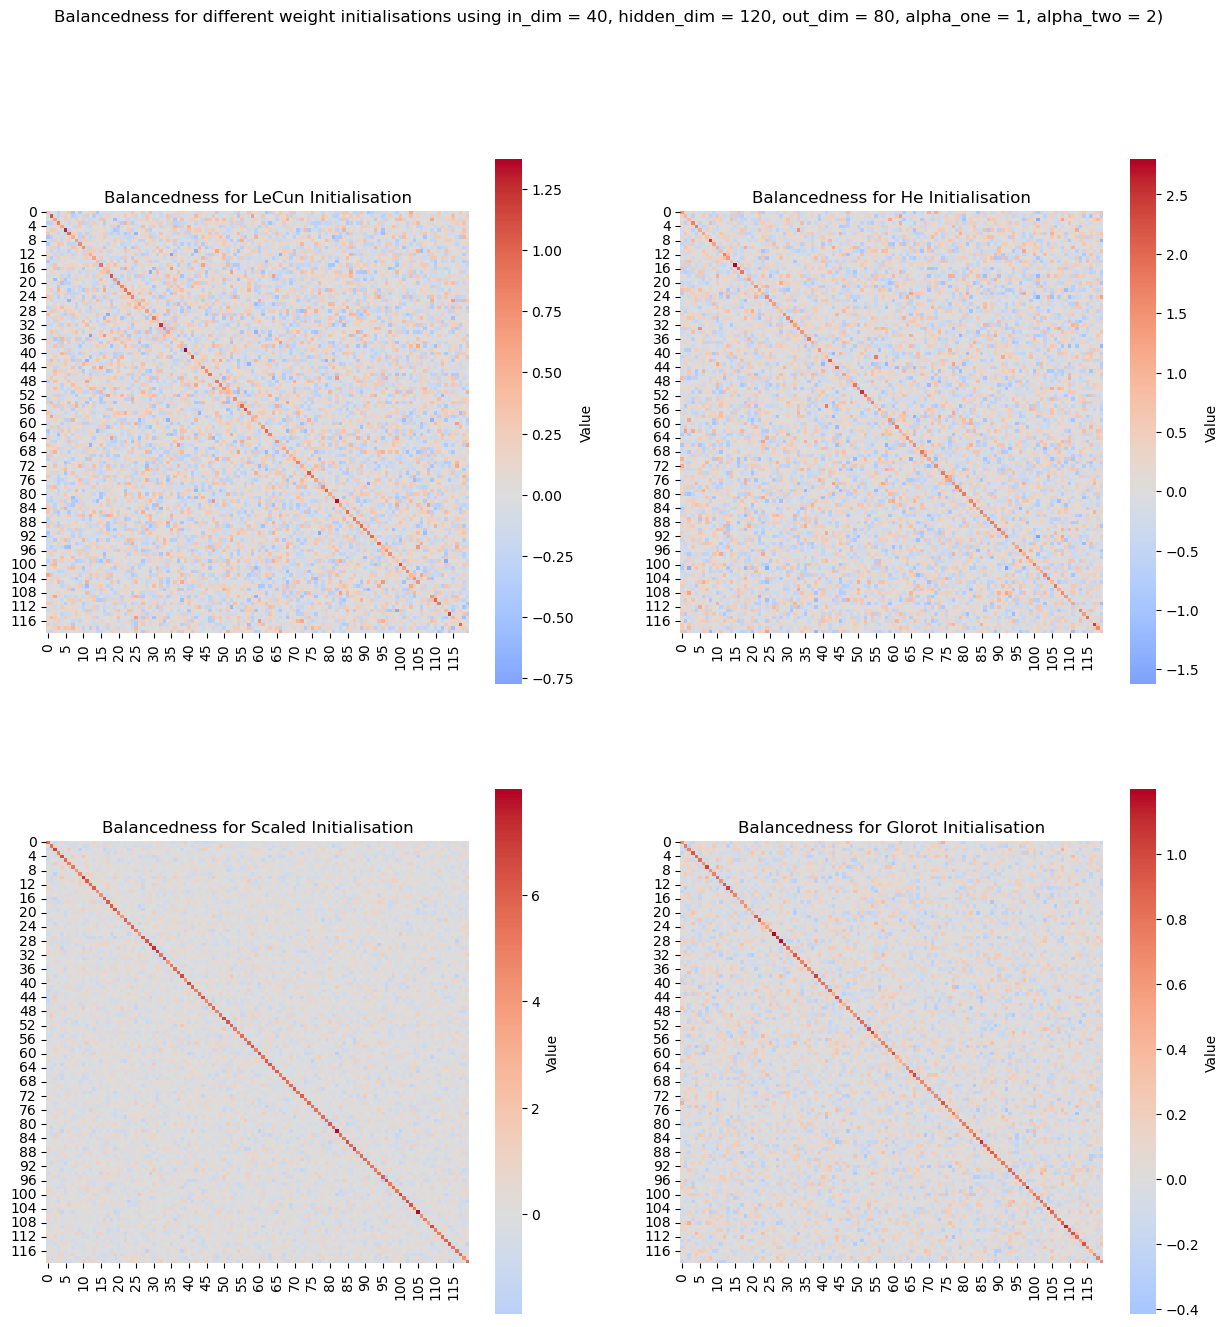

In [162]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes = axes.flatten()

for i, (ax, key) in enumerate(zip(axes, weight_inits.keys())):
    sns.heatmap(balancedness[key], cmap='coolwarm', center=0, cbar_kws={'label': 'Value'}, ax=ax)
    ax.set_title(f'Balancedness for {key} Initialisation')
    ax.set_aspect('equal')

# Customize the plot
plt.suptitle('Balancedness for different weight initialisations using in_dim = 40, hidden_dim = 120, out_dim = 80, alpha_one = 1, alpha_two = 2)')
plt.show()

In [99]:
np.sum(np.diag(balancedness['He']))/len(balancedness['He'])

-1.212868223129115

<Axes: >

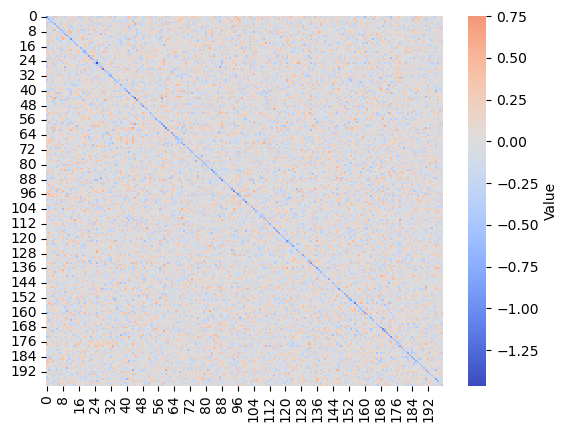

In [73]:
sns.heatmap(balancedness['LeCun'], cmap='coolwarm', center=0, cbar_kws={'label': 'Value'})

<Axes: >

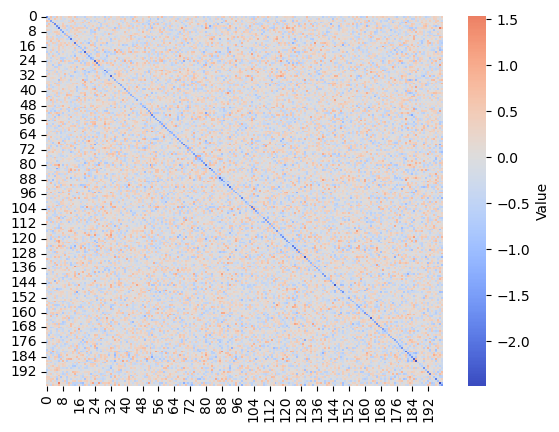

In [74]:
sns.heatmap(balancedness['He'], cmap='coolwarm', center=0, cbar_kws={'label': 'Value'})

<Axes: >

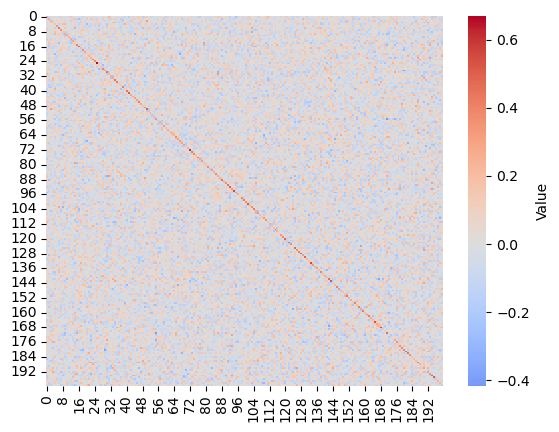

In [75]:
sns.heatmap(balancedness['Glorot'], cmap='coolwarm', center=0, cbar_kws={'label': 'Value'})

<Axes: >

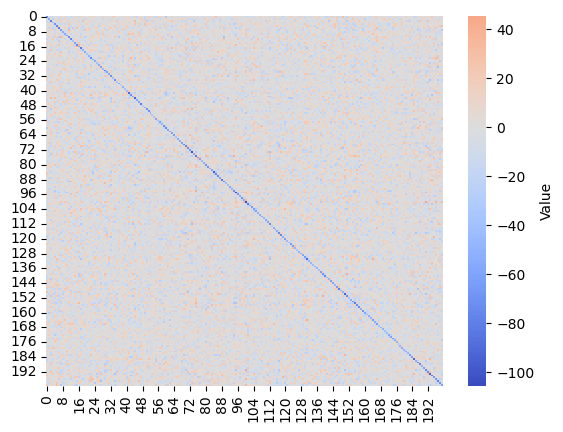

In [80]:
sns.heatmap(balancedness['Scaled'], cmap='coolwarm', center=0, cbar_kws={'label': 'Value'})

In [53]:
w1, w2 = weight_inits['LeCun']

In [54]:
w1.shape

(100, 20)

In [55]:
w2.shape

(40, 100)

In [56]:
(w2.T @ w2).shape

(100, 100)

In [57]:
(w1 @ w1.T).shape

(100, 100)